In [1]:
import os
import random
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [5]:
!wget https://zenodo.org/record/7884735/files/cxr.zip

--2025-02-11 18:30:16--  https://zenodo.org/record/7884735/files/cxr.zip
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.45.92, 188.185.48.194, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/7884735/files/cxr.zip [following]
--2025-02-11 18:30:17--  https://zenodo.org/records/7884735/files/cxr.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 8131973605 (7.6G) [application/octet-stream]
Saving to: ‘cxr.zip’

cxr.zip             100%[===================>]   7.57G  27.2MB/s    in 4m 55s  

2025-02-11 18:35:12 (26.3 MB/s) - ‘cxr.zip’ saved [8131973605/8131973605]



In [6]:
!unzip -q 'cxr.zip' -d '/cxr'

In [7]:
%cd /cxr/cxr/images

/cxr/cxr/images


## TIFF to PNG Image Conversion

In [14]:
# ========================
# INITIAL CONFIGURATION
# ========================
# Path configuration (adapt to your use case)
source_dir = "/cxr/cxr/images"    # Source folder with TIFFs
output_dir = "/content/converted_images"  # Output folder for PNGs

# Conversion parameters
NUMBER_TO_CONVERT = 50          # Number of images to convert
RANDOM_SEED = 42                # Random seed for reproducibility

# ========================
# FOLDER SETUP
# ========================
# Create output directory if needed
os.makedirs(output_dir, exist_ok=True)

# ========================
# FILE SELECTION
# ========================
# List all TIFF files in source directory
tiff_files = [
    f for f in os.listdir(source_dir)
    if f.lower().endswith(('.tiff', '.tif'))  # Handle both extensions
]

# Randomly select N files
random.seed(RANDOM_SEED)
selected_files = random.sample(
    tiff_files,
    min(NUMBER_TO_CONVERT, len(tiff_files))  # Handle cases with fewer files
)

print(f"🔍 {len(tiff_files)} TIFF files found")
print(f"🎯 {len(selected_files)} files selected for conversion")

# ========================
# IMAGE CONVERSION
# ========================
print("\n🚀 Starting conversion...")

for i, filename in enumerate(selected_files):
    # Build full paths
    input_path = os.path.join(source_dir, filename)
    base_name = os.path.splitext(filename)[0]
    output_path = os.path.join(output_dir, f"{base_name}.png")

    try:
        # Convert and save
        with Image.open(input_path) as img:
            img.convert('RGB').save(output_path)  # RGB conversion for compatibility

        # Progress tracking
        progress = f"{i+1}/{len(selected_files)}"
        print(f"✅ {progress} - {filename} converted successfully")

    except Exception as e:
        print(f"❌ Error converting {filename}: {str(e)}")

# ========================
# FINAL REPORT
# ========================
print("\n✨ Conversion complete!")
print(f"📂 Output folder: {output_dir}")
print(f"💾 {len(selected_files)} images converted to PNG")

🔍 112120 TIFF files found
🎯 50 files selected for conversion

🚀 Starting conversion...
✅ 1/50 - 010938.tiff converted successfully
✅ 2/50 - 043930.tiff converted successfully
✅ 3/50 - 028253.tiff converted successfully
✅ 4/50 - 054950.tiff converted successfully
✅ 5/50 - 010437.tiff converted successfully
✅ 6/50 - 020549.tiff converted successfully
✅ 7/50 - 025645.tiff converted successfully
✅ 8/50 - 023691.tiff converted successfully
✅ 9/50 - 021721.tiff converted successfully
✅ 10/50 - 077701.tiff converted successfully
✅ 11/50 - 105174.tiff converted successfully
✅ 12/50 - 033628.tiff converted successfully
✅ 13/50 - 014169.tiff converted successfully
✅ 14/50 - 039159.tiff converted successfully
✅ 15/50 - 111765.tiff converted successfully
✅ 16/50 - 020699.tiff converted successfully
✅ 17/50 - 029692.tiff converted successfully
✅ 18/50 - 081754.tiff converted successfully
✅ 19/50 - 025559.tiff converted successfully
✅ 20/50 - 006598.tiff converted successfully
✅ 21/50 - 009192.tiff 


## Resize medical images to 256x256 pixels with format standardization

In [16]:
# ========================
# CONFIGURATION
# ========================
INPUT_DIR = "/content/converted_images"   # Source of 224x224 images
OUTPUT_DIR = "/content/256_xray_data"     # Destination for resized images
TARGET_SIZE = (256, 256)                 # Target dimensions (width, height)
ALLOWED_EXTENSIONS = ('.png', '.jpg', '.jpeg', '.tiff', '.tif')  # Supported formats
CONVERT_TIFF_TO_PNG = True               # Whether to auto-convert TIFFs to PNG

# ========================
# FOLDER PREPARATION
# ========================
# Create output directory if needed
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"📂 Output directory prepared: {OUTPUT_DIR}")

# ========================
# IMAGE PROCESSING
# ========================
# Get valid image files
image_files = [
    f for f in os.listdir(INPUT_DIR)
    if f.lower().endswith(ALLOWED_EXTENSIONS)
]

print(f"🔍 Found {len(image_files)} images to process")

success_count = 0
error_files = []

# Process images with progress bar
with tqdm(total=len(image_files), desc="🔄 Resizing images") as pbar:
    for filename in image_files:
        input_path = os.path.join(INPUT_DIR, filename)
        output_path = os.path.join(OUTPUT_DIR, filename)

        try:
            with Image.open(input_path) as img:
                # High-quality resizing with Lanczos filter
                resized_img = img.resize(TARGET_SIZE, Image.Resampling.LANCZOS)

                # Handle TIFF conversion if enabled
                if CONVERT_TIFF_TO_PNG and filename.lower().endswith(('.tiff', '.tif')):
                    output_path = os.path.splitext(output_path)[0] + '.png'

                # Preserve original format unless converting TIFF
                resized_img.save(output_path)
                success_count += 1

        except Exception as e:
            error_files.append((filename, str(e)))

        pbar.update(1)

# ========================
# PROCESSING REPORT
# ========================
print(f"\n{'✅' if success_count == len(image_files) else '⚠️'} Processing complete!")
print(f"📊 Successfully processed: {success_count}/{len(image_files)}")
print(f"📁 Output location: {OUTPUT_DIR}")

if error_files:
    print("\n❌ Encountered errors with:")
    for filename, error in error_files:
        print(f"  - {filename}: {error}")

# ========================
# OPTIONAL: DATA EXPORT
# ========================
# Uncomment below for Google Colab zip/download

# Compress results
#!zip -r -q /content/256_xray_data.zip {OUTPUT_DIR}

# Initiate download
#files.download("/content/256_xray_data.zip")

#print("\n📦 Zip archive prepared and download initiated")

📂 Output directory prepared: /content/256_xray_data
🔍 Found 50 images to process


🔄 Resizing images: 100%|██████████| 50/50 [00:01<00:00, 46.17it/s]


✅ Processing complete!
📊 Successfully processed: 50/50
📁 Output location: /content/256_xray_data


## Display sample images from dataset

📁 Image directory: /content/256_xray_data
🔍 Found 50 medical images
📸 Displaying 25 samples in (5, 5) grid


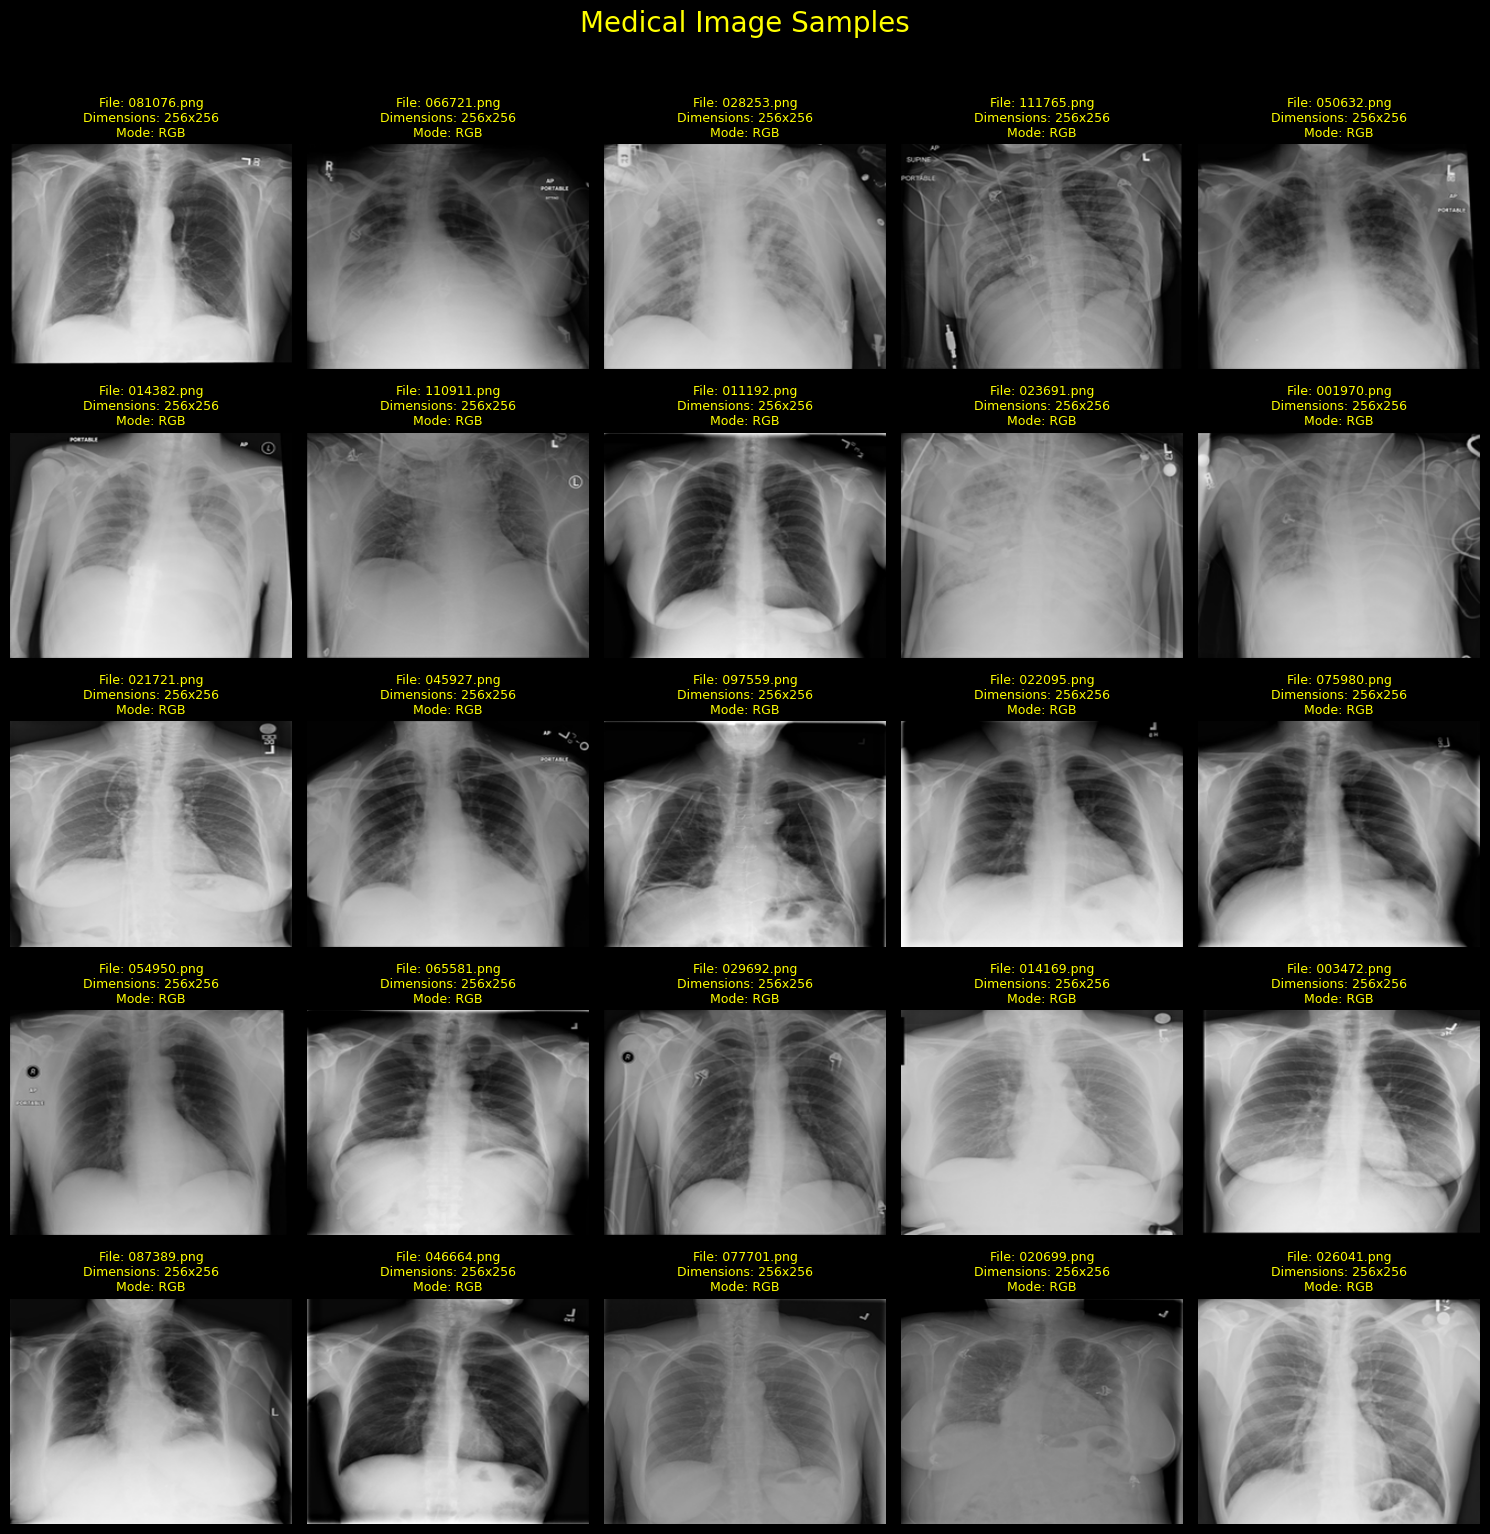

In [22]:
# ========================
# CONFIGURATION
# ========================
IMAGE_DIR = '/content/256_xray_data'  # Path to processed images
IMAGE_EXTENSIONS = ('.png', '.jpg', '.jpeg')  # Supported formats
GRID_SIZE = (5, 5)                   # Visualization grid dimensions
DISPLAY_METADATA = True              # Show filename and dimensions

# ========================
# DATA PREPARATION
# ========================
# Get list of medical images
image_files = [
    f for f in os.listdir(IMAGE_DIR)
    if f.lower().endswith(IMAGE_EXTENSIONS)
]

# Calculate sample size based on grid
num_samples = GRID_SIZE[0] * GRID_SIZE[1]
sample_files = image_files[:num_samples]

print(f"📁 Image directory: {IMAGE_DIR}")
print(f"🔍 Found {len(image_files)} medical images")
print(f"📸 Displaying {len(sample_files)} samples in {GRID_SIZE} grid")

# ========================
# VISUALIZATION SETUP
# ========================
plt.style.use('dark_background')
fig, axes = plt.subplots(*GRID_SIZE, figsize=(15, 15))
fig.suptitle('Medical Image Samples', y=1.02, fontsize=20, color='yellow')

# Flatten axes array for easy iteration
axes = axes.flatten()

# ========================
# IMAGE DISPLAY
# ========================
for ax, filename in zip(axes, sample_files):
    ax.set_visible(True)  # Ensure axis is visible
    try:
        img_path = os.path.join(IMAGE_DIR, filename)
        with Image.open(img_path) as img:
            # Display image
            ax.imshow(img, cmap='gray', aspect='auto')

            # Add metadata annotations
            if DISPLAY_METADATA:
                title_elements = [
                    f"File: {filename}",
                    f"Dimensions: {img.size[0]}x{img.size[1]}",
                    f"Mode: {img.mode}"
                ]
                ax.set_title('\n'.join(title_elements), fontsize=9, color='yellow')

            ax.axis('off')

    except Exception as e:
        ax.set_visible(False)  # Hide failed axis
        print(f"⚠️ Error loading {filename}: {str(e)}")

# ========================
# FINAL LAYOUT
# ========================
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

## Compact 4x4 grid of PNG images

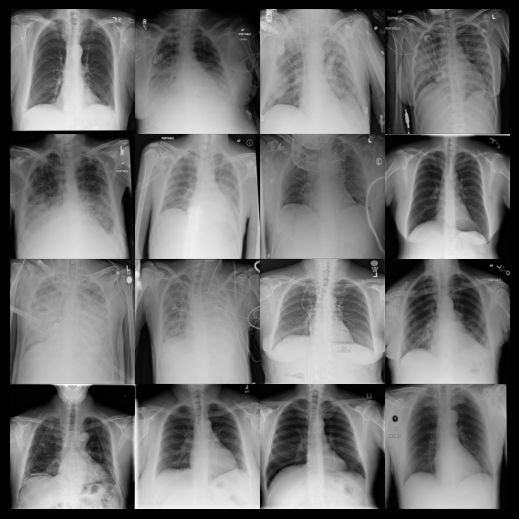

In [35]:
# ========================
# CONFIGURATION
# ========================
IMAGE_DIR = '/content/256_xray_data'  # Source directory with PNGs
OUTPUT_PATH = "/content/cxr_grid.png"   # Output file path
GRID_SIZE = (4, 4)                     # Rows x Columns for display
DPI = 300                              # Output resolution
CMAP = 'gray'                          # Colormap for X-rays
FIG_SIZE = (5, 5)                    # Increased figure size for visibility

# ========================
# DATA PREPARATION
# ========================
# Get PNG files and select samples
png_files = [f for f in os.listdir(IMAGE_DIR) if f.lower().endswith('.png')]
sample_files = png_files[:GRID_SIZE[0]*GRID_SIZE[1]]

# ========================
# VISUALIZATION SETUP
# ========================
# Create figure with tight layout
fig, axes = plt.subplots(*GRID_SIZE, figsize=FIG_SIZE,
                        gridspec_kw={'wspace':0, 'hspace':0})
axes = axes.flatten()

# ========================
# IMAGE PROCESSING
# ========================
for ax, filename in zip(axes, sample_files):
    try:
        img_path = os.path.join(IMAGE_DIR, filename)
        with Image.open(img_path) as img:
            ax.imshow(img, cmap=CMAP)
            ax.axis('off')
    except Exception as e:
        ax.axis('off')
        print(f"⚠️ Error loading {filename}: {str(e)}")

# ========================
# OUTPUT GENERATION
# ========================
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# Display before saving
plt.show()

# Save after display
plt.savefig(OUTPUT_PATH, bbox_inches='tight', pad_inches=0, dpi=DPI)
plt.close()